In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('../data/insurance_data_cleaned.csv')

# Quick check
df.head()


C:\Users\Hp\AppData\Local\Temp\ipykernel_13804\1958547011.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/insurance_data_cleaned.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,CustomValueCategory
0,145249,12827,2015-03-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,High
1,145249,12827,2015-05-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,High
2,145249,12827,2015-07-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,High
3,145255,12827,2015-05-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,High
4,145255,12827,2015-07-01,True,Unknown,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,High


In [10]:
# Group by Province
groups = [group['SumInsured'].dropna() for name, group in df.groupby('Province')]

# ANOVA Test
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Test for Provinces:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Significant risk differences across provinces.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences across provinces.")


ANOVA Test for Provinces:
F-statistic: 4.357332077505888, P-value: 2.8376868065530723e-05
Reject Null Hypothesis: Significant risk differences across provinces.


In [11]:
# Group by PostalCode
groups_zip = [group['SumInsured'].dropna() for name, group in df.groupby('PostalCode')]

# ANOVA Test
f_stat_zip, p_value_zip = stats.f_oneway(*groups_zip)

print("ANOVA Test for Zip Codes:")
print(f"F-statistic: {f_stat_zip}, P-value: {p_value_zip}")

# Interpretation
if p_value_zip < 0.05:
    print("Reject Null Hypothesis: Significant risk differences between zip codes.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences between zip codes.")


ANOVA Test for Zip Codes:
F-statistic: 2.645209108527459, P-value: 5.887632722338123e-132
Reject Null Hypothesis: Significant risk differences between zip codes.


In [12]:
# Create two groups based on median
median_value = df['SumInsured'].median()
group_a = df[df['SumInsured'] <= median_value]['SumInsured']
group_b = df[df['SumInsured'] > median_value]['SumInsured']

# Perform t-test
t_stat, p_value_margin = stats.ttest_ind(group_a, group_b)

print("T-Test for Profit Margins by Zip Codes:")
print(f"T-statistic: {t_stat}, P-value: {p_value_margin}")

# Interpretation
if p_value_margin < 0.05:
    print("Reject Null Hypothesis: Significant profit margin differences between zip codes.")
else:
    print("Fail to Reject Null Hypothesis: No significant profit margin differences between zip codes.")


T-Test for Profit Margins by Zip Codes:
T-statistic: -624.6055569700428, P-value: 0.0
Reject Null Hypothesis: Significant profit margin differences between zip codes.


In [13]:
# Group by Gender
male_group = df[df['Gender'] == 'Male']['SumInsured']
female_group = df[df['Gender'] == 'Female']['SumInsured']

# Perform t-test
t_stat_gender, p_value_gender = stats.ttest_ind(male_group, female_group)

print("T-Test for Risk Differences by Gender:")
print(f"T-statistic: {t_stat_gender}, P-value: {p_value_gender}")

# Interpretation
if p_value_gender < 0.05:
    print("Reject Null Hypothesis: Significant risk differences between Men and Women.")
else:
    print("Fail to Reject Null Hypothesis: No significant risk differences between Men and Women.")


T-Test for Risk Differences by Gender:
T-statistic: -1.3269641023582246, P-value: 0.18452666992352143
Fail to Reject Null Hypothesis: No significant risk differences between Men and Women.


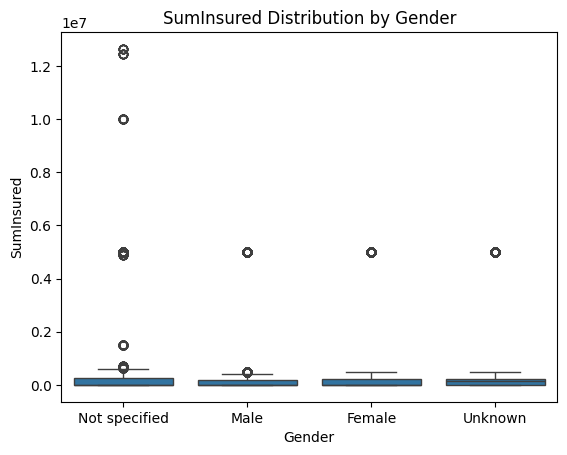

In [14]:
sns.boxplot(x='Gender', y='SumInsured', data=df)
plt.title('SumInsured Distribution by Gender')
plt.show()


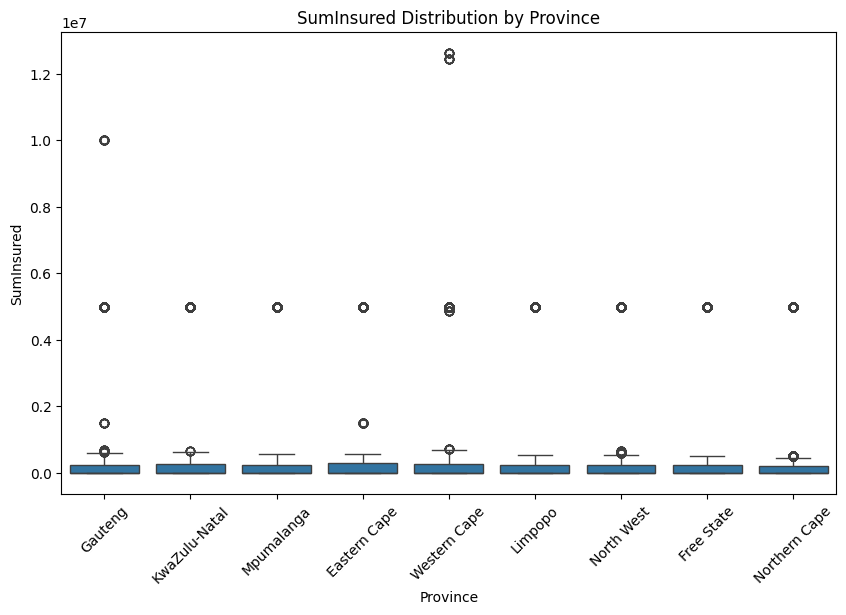

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='SumInsured', data=df)
plt.title('SumInsured Distribution by Province')
plt.xticks(rotation=45)
plt.show()
